In [22]:
import numpy as np
import pandas as pd
from functions.N_fctn_load_excel import load_excel_to_dataframe
import warnings
# Suppress the warning
warnings.filterwarnings("ignore", category=Warning)

In [23]:
#dataset creation:
daf_non_reduced_with_coin_none_deleted = load_excel_to_dataframe('df_nonreduced_coins.xlsx')
daf_non_reduced_with_coin_none_deleted = daf_non_reduced_with_coin_none_deleted[daf_non_reduced_with_coin_none_deleted['coins'] != 0]


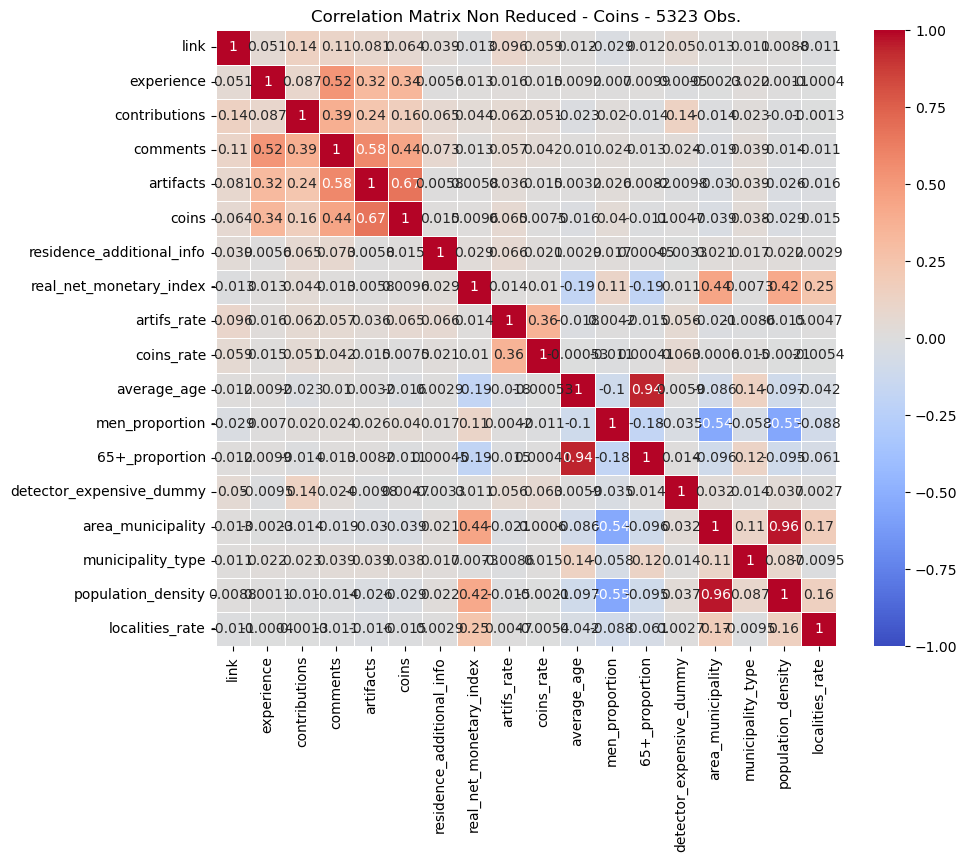

In [24]:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix
create_correlation_matrix(daf_non_reduced_with_coin_none_deleted,['link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                    
'area_municipality',                           
'municipality_type',                           
'population_density',                         
'localities_rate'],'Correlation Matrix Non Reduced - Coins - 5323 Obs.')


In [25]:
#from the correlation matrix we chose 10 variables with the strongest correlation to rates and that are subject to the main hypotheses:
from functions.B_fctn_drop_columns import drop_columns
daf_non_reduced_with_coin_none_deleted = drop_columns(daf_non_reduced_with_coin_none_deleted, ['area_municipality',                           
'municipality_type',                           
'population_density',
'average_age',                            
'uploaded_at_least_one_artif_or_coin_dummy',   
'men_proportion',                              
'65+_proportion'])

In [26]:

#B) SUMMARY STATS
from functions.Q_fction_get_summary_statistics import get_summary_statistics
summary_non_reduced_1_coins = get_summary_statistics(daf_non_reduced_with_coin_none_deleted)
print(summary_non_reduced_1_coins)

                           count  unique                mode  frequency
profile                     5322    5322               Detek          1
link                        5322       2                 0.0       5164
experience                  5322    1067                 0.0       1658
contributions               5322     107                 0.0       4088
comments                    5322     719                 0.0        343
artifacts                   5322     293                 0.0        936
coins                       5322     179                 1.0       1356
residence_additional_info   5322       2                 0.0       5253
municipality                2778     696               Praha        243
municipal_office            2765     328  Hlavní město Praha        269
real_net_monetary_index     5322     329                 1.0       2557
submitted_number_artifs     4378      44                 0.0       3864
number_artifs               4378     291                 1.0    

In [27]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics

summary_non_reduced_1_ext_coins = get_extended_summary_statistics(daf_non_reduced_with_coin_none_deleted)
print(summary_non_reduced_1_ext_coins)

                            count     mean       std   min   25%    50%  \
link                       5322.0     0.03      0.17  0.00  0.00   0.00   
experience                 5322.0  1160.45  10609.45  0.00  0.00  21.00   
contributions              5322.0     3.42     26.13  0.00  0.00   0.00   
comments                   5322.0   199.56    946.87  0.00  4.00  16.00   
artifacts                  5322.0    28.54     86.26  0.00  1.00   7.00   
coins                      5322.0    14.10     32.46  1.00  1.00   4.00   
residence_additional_info  5322.0     0.01      0.11  0.00  0.00   0.00   
real_net_monetary_index    5322.0     1.00      0.05  0.77  0.98   1.00   
submitted_number_artifs    4378.0     0.71      4.37  0.00  0.00   0.00   
number_artifs              4378.0    34.69     94.03  1.00  4.00  10.00   
artifs_rate                5322.0     0.01      0.07  0.00  0.00   0.00   
submitted_number_coins     5322.0     0.08      0.97  0.00  0.00   0.00   
number_coins             

In [28]:

df_log_coins = daf_non_reduced_with_coin_none_deleted[['artifs_rate', 'experience','contributions',               
'comments',                    
'artifacts',                   
'coins',                                      
'real_net_monetary_index',                 
'coins_rate',                    
'localities_rate','rate_artifs_dummy',                           
'rate_coins_dummy', 'link', 'residence_additional_info', 'detector_expensive_dummy']]


df_log_coins['log_experience'] = np.log(df_log_coins['experience'].values + 1)
df_log_coins['log_contributions'] = np.log(df_log_coins['contributions'].values + 1)
df_log_coins['log_comments'] = np.log(df_log_coins['comments'].values + 1)
df_log_coins['log_artifacts'] = np.log(df_log_coins['artifacts'].values + 1)
df_log_coins['log_coins'] = np.log(df_log_coins['coins'].values + 1)
df_log_coins['log_coins_rate'] = np.log(df_log_coins['coins_rate'].values + 1)
df_log_coins['log_artifs_rate'] = np.log(df_log_coins['artifs_rate'].values + 1)
df_log_coins['reverse_coins_rate'] = (1 - df_log_coins['coins_rate'].values) 




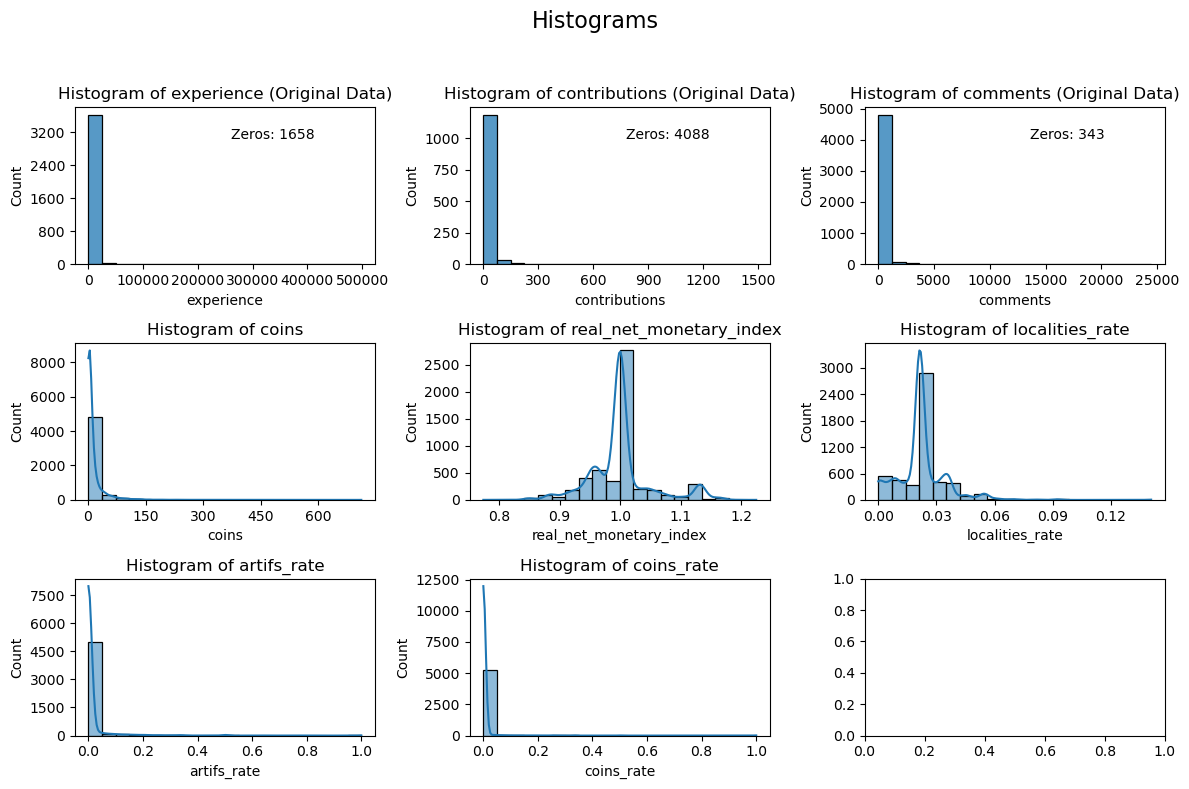

In [29]:
from functions.S_fctn_create_combined_hist import create_histograms_all
create_histograms_all(df_log_coins, [                        
'experience',                  
'contributions',               
'comments',                                       
'coins',                                      
'real_net_monetary_index',                    
'localities_rate', 'artifs_rate', 'coins_rate'])

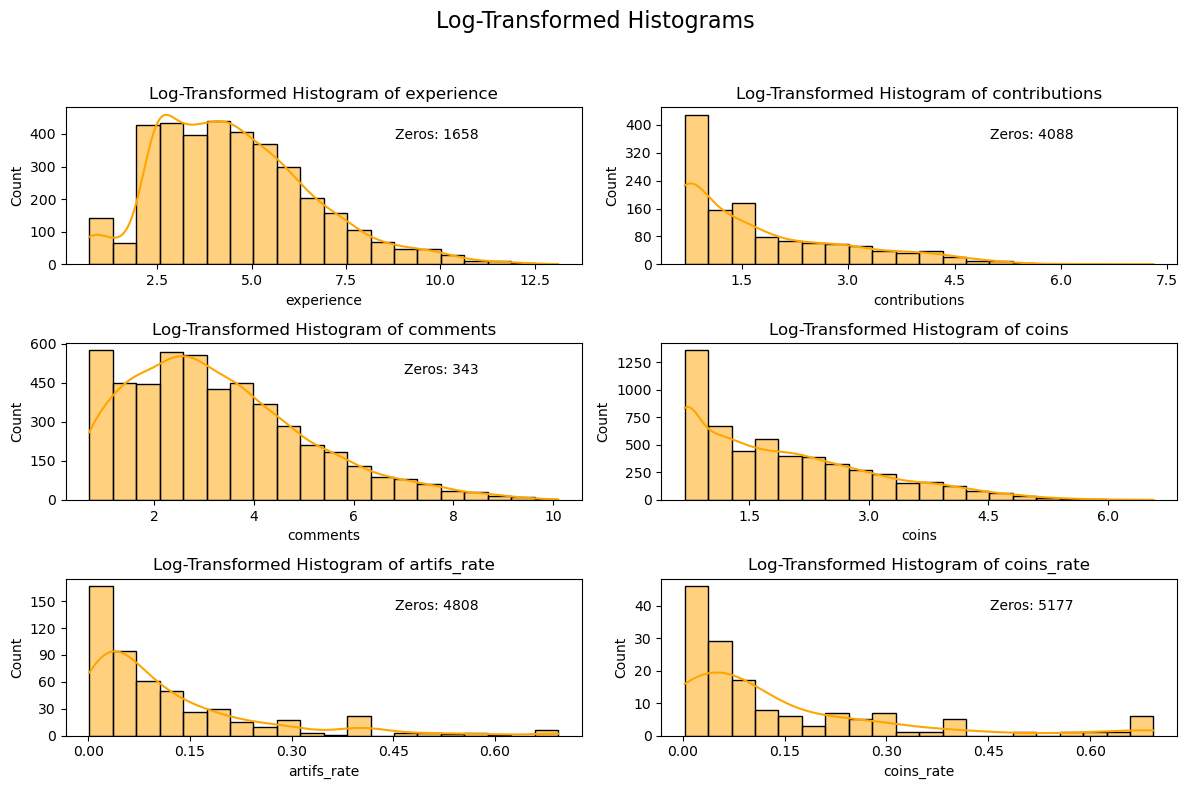

In [30]:

from functions.S_fctn_create_combined_hist import create_log_transformed_histograms

create_log_transformed_histograms(df_log_coins, [                        
'experience',                  
'contributions',               
'comments',                                    
'coins',                                                          
'artifs_rate', 'coins_rate'])

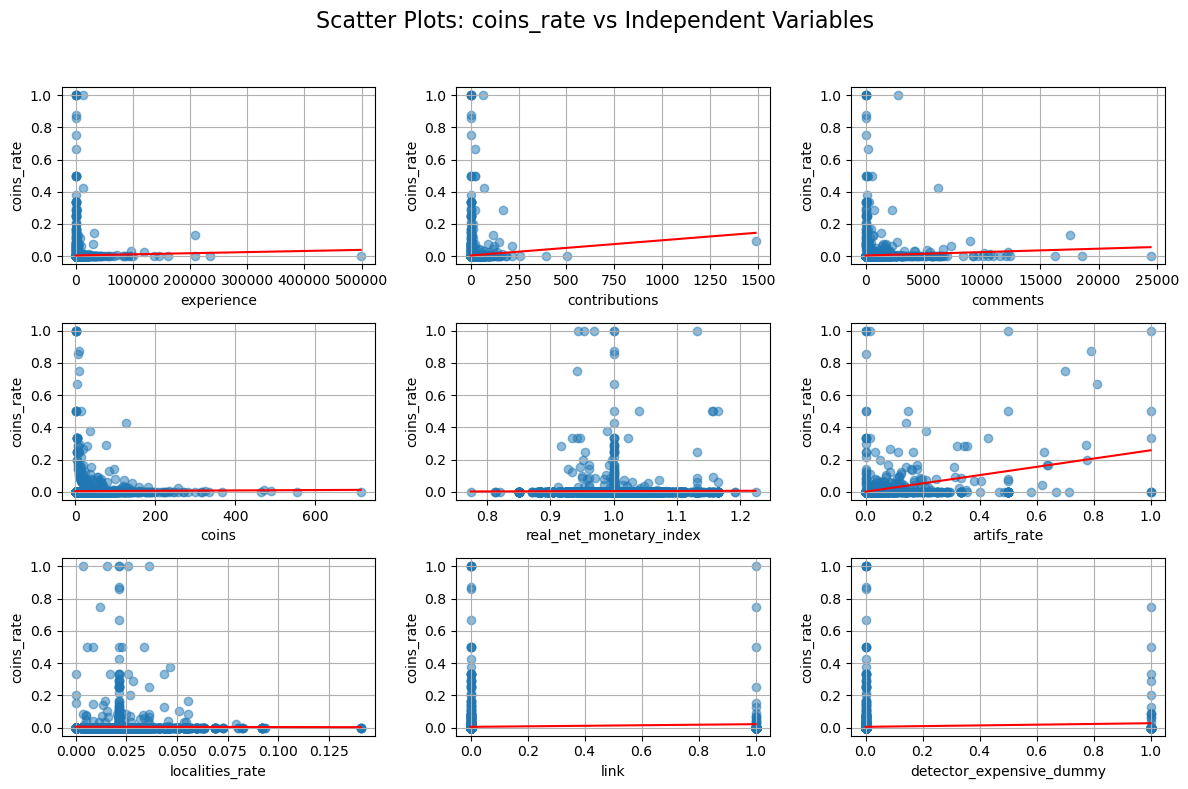

In [31]:
#'PLOT INITIAL SCATTER PLOTS
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_coins, 'coins_rate', ['experience', 'contributions',
                                     'comments', 'coins',
                                     'real_net_monetary_index', 'artifs_rate', 'localities_rate','link','detector_expensive_dummy'])


In [32]:
from functions.W_fctn_print_top import print_top_observations

print_top_observations(df_log_coins, columns=[ 'experience','contributions',               
'comments',                    
'coins'])

Top 5 observations for column 'experience':
      experience  contributions  comments  coins
2765      498425             75     16255    176
2766      235138             20      9632    324
2767      209125            119     17572     85
71        207830             25      3085    282
2768      161310             25      4455    142

Top 5 observations for column 'contributions':
      experience  contributions  comments  coins
36           604           1489      8964     54
3729          88            502      2554      7
1034          74            395     24463    257
3203         506            256      4554     31
557           80            215      2005     12

Top 5 observations for column 'comments':
      experience  contributions  comments  coins
1034          74            395     24463    257
2770       99725              7     18608     14
2767      209125            119     17572     85
2765      498425             75     16255    176
2801       22958             62 

In [33]:

df_log_2 = df_log_coins.copy()



df_log_2 = df_log_2[df_log_2['experience'] != 498425]
df_log_2 = df_log_2[df_log_2['contributions'] != 1489]
df_log_2 = df_log_2[df_log_2['comments'] != 24463]
                                                    #DELETE THE MOST SIGNIFICANT OUTLIERS

df_log_3 = df_log_2.copy()                        #DF_LOG_3 USED JUST FOR THE BINARY DEPENDENT MODELS
df_log_2 = df_log_2[df_log_2['coins_rate'] != 1]  #DELETE THE ONES


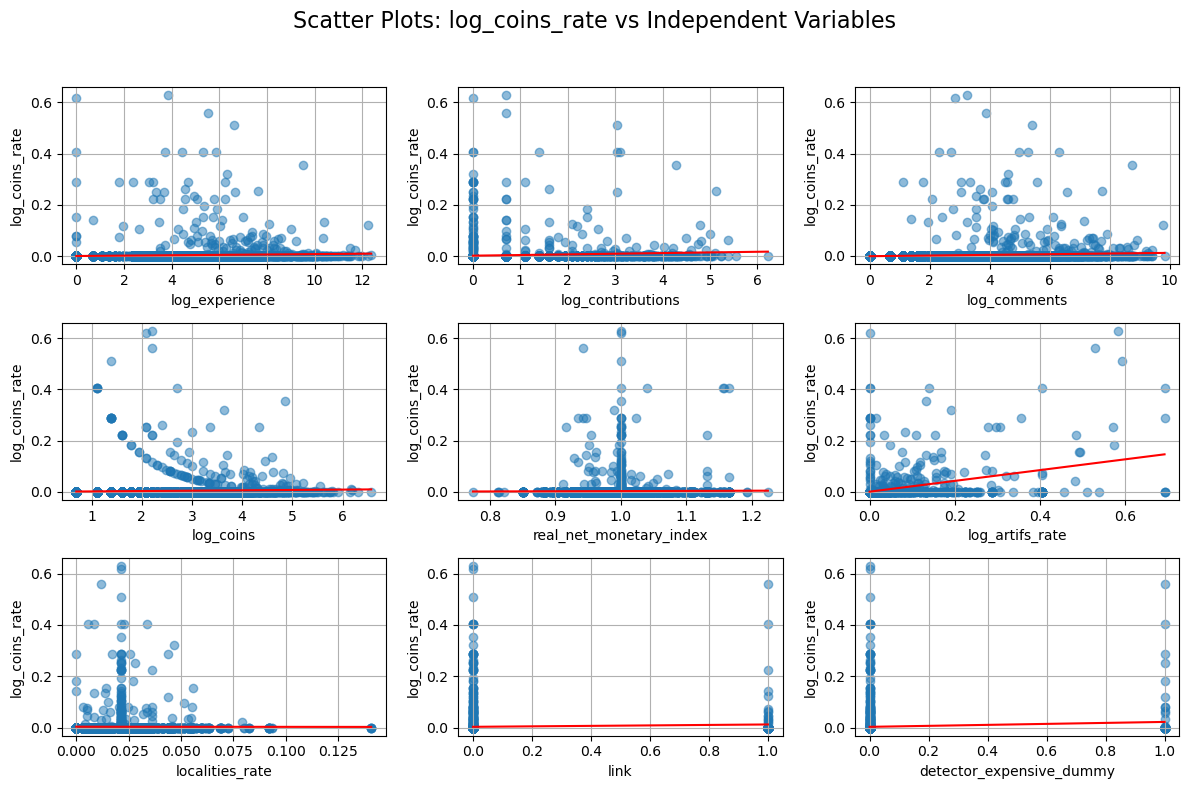

In [34]:
#plot scatter plots after log transform and without outliers:
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                      'log_comments', 'log_coins', 
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link','detector_expensive_dummy'])

In [35]:
from functions.V_fct_OLS_REGRESSION import ols_regression


#first model, without log transform:
model1 = ols_regression(df_log_2, 'coins_rate', [ 'experience', 'contributions', 'comments', 'coins',
                                      'real_net_monetary_index', 'log_artifs_rate', 'localities_rate', 'link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             coins_rate   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.28e-186
Time:                        21:03:04   Log-Likelihood:                 10792.
No. Observations:                5313   AIC:                        -2.156e+04
Df Residuals:                    5302   BIC:                        -2.149e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [36]:


model2 = ols_regression(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])



Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     104.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          8.59e-198
Time:                        21:03:04   Log-Likelihood:                 11904.
No. Observations:                5313   AIC:                        -2.379e+04
Df Residuals:                    5302   BIC:                        -2.371e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [37]:
from functions.V_fctn_OLS_ROBUST import ols_regression_robust


model2_ROBUST = ols_regression_robust(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.314
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.33e-11
Time:                        21:03:04   Log-Likelihood:                 11904.
No. Observations:                5313   AIC:                        -2.379e+04
Df Residuals:                    5302   BIC:                        -2.371e+04
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [38]:
from functions.V_fctn_OLS_WLS import ols_regression_wls
model2_WLS = ols_regression_wls(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])



Regression Summary:
                            WLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.914
Model:                            WLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5659.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:03:04   Log-Likelihood:                 36655.
No. Observations:                5313   AIC:                        -7.329e+04
Df Residuals:                    5302   BIC:                        -7.322e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [39]:
model2_LPM = ols_regression_robust(df_log_3, 'rate_coins_dummy', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:       rate_coins_dummy   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     18.11
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           5.55e-33
Time:                        21:03:04   Log-Likelihood:                 2699.5
No. Observations:                5319   AIC:                            -5377.
Df Residuals:                    5308   BIC:                            -5305.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

Optimization terminated successfully.
         Current function value: 0.081343
         Iterations 9


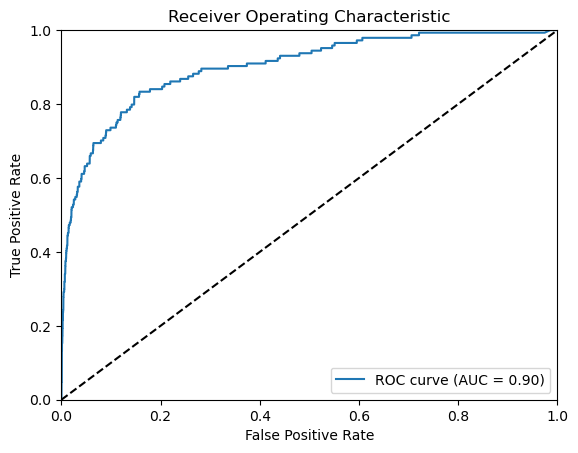

Confusion Matrix:
Predicted     0   1
Actual             
0          5163  12
1           117  27

Partial Effect At the Average (PEA):
        Logit Marginal Effects       
Dep. Variable:       rate_coins_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0008      0.001      0.839      0.401      -0.001       0.003
log_contributions             0.0022      0.002      1.343      0.179      -0.001       0.006
log_comments                  0.0049      0.002      2.934      0.003       0.002       0.008
log_coins                     0.0111      0.002      4.858      0.000       0.007       0.016
real_net_monetary_index      -0.0022      0.042     -0.054      0.957      -0.084       0.080
log_artifs_rate               0.2236      0.019     11

In [40]:
from functions.V_fctn_LOGIT import logit_regression_roc_wald
model2_LOGIT = logit_regression_roc_wald(df_log_3, dependent_var='rate_coins_dummy', independent_vars=['log_experience', 'log_contributions', 
                                        'log_comments', 'log_coins',
                                        'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'],
                                        pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                        ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                        hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])



Optimization terminated successfully.
         Current function value: 0.081356
         Iterations 8


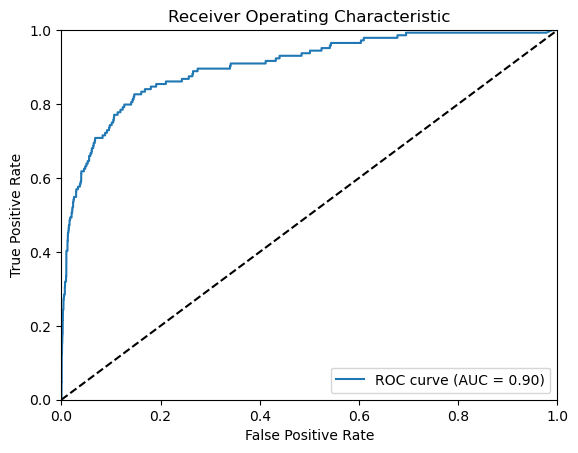

Confusion Matrix:
Predicted     0   1
Actual             
0          5166   9
1           121  23

Partial Effect At the Average (PEA):
       Probit Marginal Effects       
Dep. Variable:       rate_coins_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0008      0.001      0.860      0.390      -0.001       0.003
log_contributions             0.0025      0.002      1.413      0.158      -0.001       0.006
log_comments                  0.0044      0.002      2.627      0.009       0.001       0.008
log_coins                     0.0102      0.002      4.558      0.000       0.006       0.015
real_net_monetary_index       0.0064      0.041      0.157      0.875      -0.074       0.087
log_artifs_rate               0.2385      0.020     11

In [41]:
from functions.V_fctn_PROBIT import probit_regression_roc_wald


model2_PROBIT = probit_regression_roc_wald(df_log_3, dependent_var='rate_coins_dummy', independent_vars=['log_experience', 'log_contributions', 
                                            'log_comments', 'log_coins',
                                            'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'],
                                            pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                            ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                            hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])

